# 1. IMPORTATION DES PACKAGES

In [2]:
import glob
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import os
from random import randint
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random

2025-05-09 13:01:29.541683: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-09 13:01:29.803782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746795689.897320   29144 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746795689.925894   29144 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746795690.158292   29144 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

# 2. LECTURE DES FICHIERS

In [3]:
targets = []
features = []

# Chargement des images depuis les deux sous-dossiers
cat_files = glob.glob('dogs_vs_cats/train/cats/*.jpg')
dog_files = glob.glob('dogs_vs_cats/train/dogs/*.jpg')

print(f"{len(cat_files)} images de chats trouvées.")
print(f"{len(dog_files)} images de chiens trouvées.")

10000 images de chats trouvées.
10000 images de chiens trouvées.


# 3. PRETRAIMENT DES DONNEES

In [4]:
# Traitement des images de chats
for file in cat_files:
    try:
        image = Image.open(file).resize((75, 75))
        features.append(np.array(image))
        targets.append([1, 0])  # [chat, chien]
    except Exception as e:
        print(f"Erreur avec {file} : {e}")

# Traitement des images de chiens
for file in dog_files:
    try:
        image = Image.open(file).resize((75, 75))
        features.append(np.array(image))
        targets.append([0, 1])  # [chat, chien]
    except Exception as e:
        print(f"Erreur avec {file} : {e}")

# Conversion en tableaux numpy
features = np.array(features)
targets = np.array(targets)

print("features shape:", features.shape)
print("targets shape:", targets.shape)

features shape: (20000, 75, 75, 3)
targets shape: (20000, 2)


# 4. VISUALISATION DES DONNEES

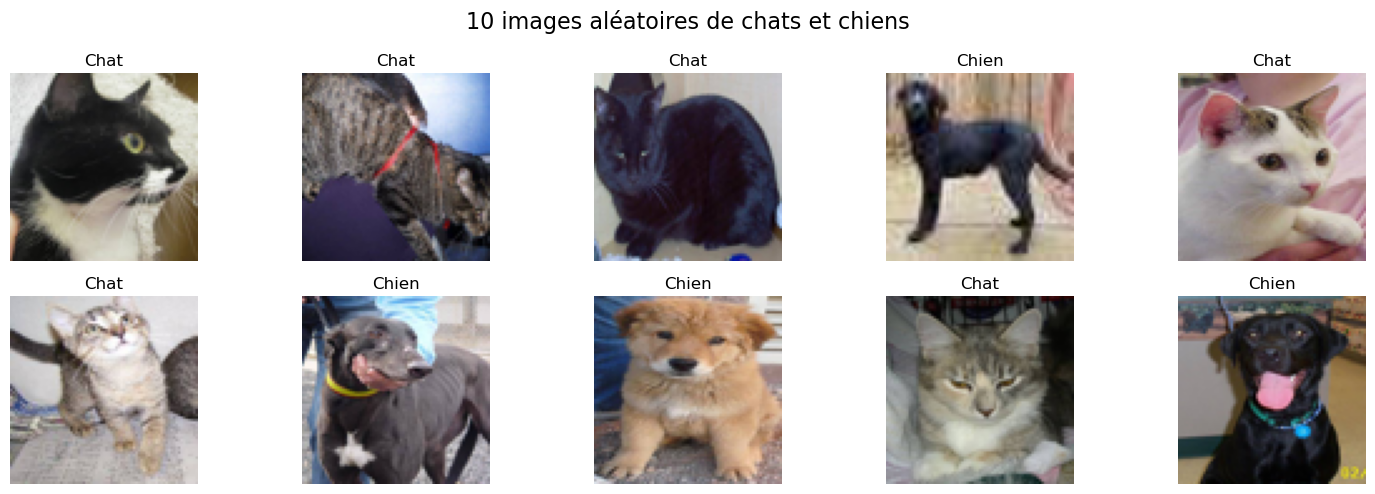

In [5]:
# 10 indices aléatoires
indices = random.sample(range(len(features)), 10)

plt.figure(figsize=(15, 5))

for i, idx in enumerate(indices):
    img = features[idx]
    label = targets[idx]

    # Décodage du label
    label_text = "Chat" if np.array_equal(label, [1, 0]) else "Chien"

    # Affichage
    plt.subplot(2, 5, i + 1)
    plt.imshow(img.astype('uint8'))  # Affiche l'image
    plt.title(label_text)
    plt.axis('off')

plt.suptitle("10 images aléatoires de chats et chiens", fontsize=16)
plt.tight_layout()
plt.show()

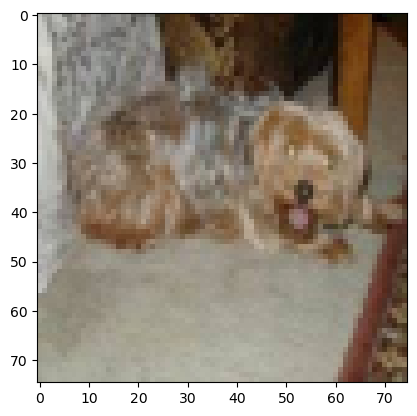

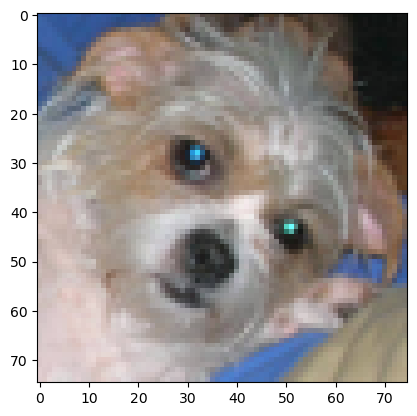

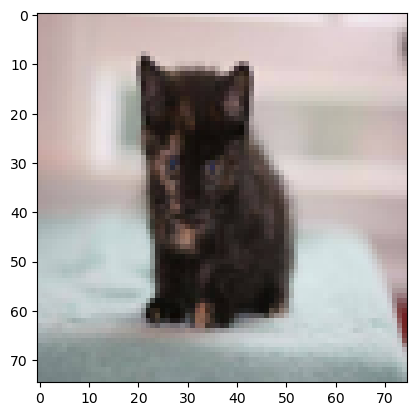

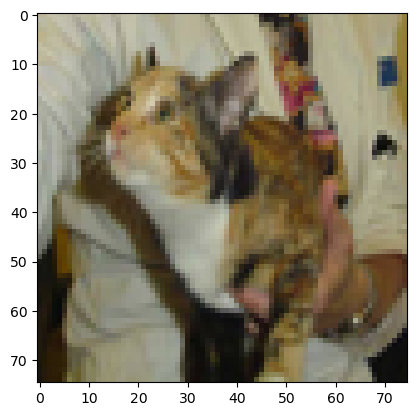

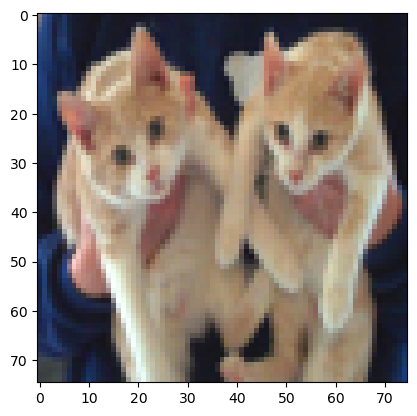

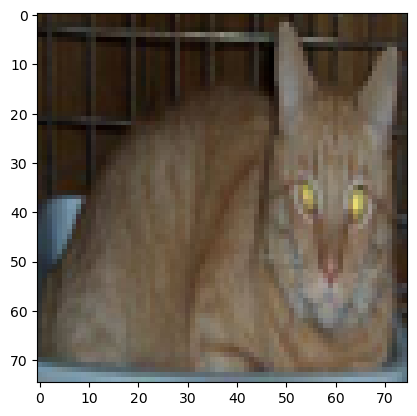

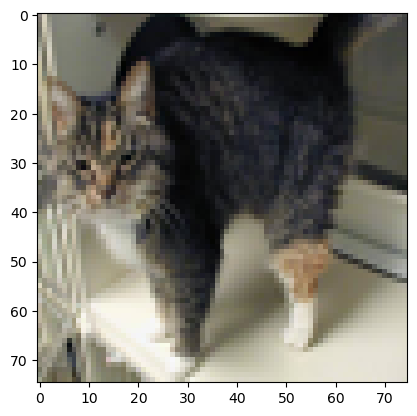

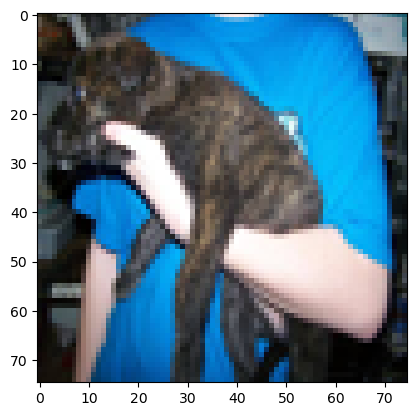

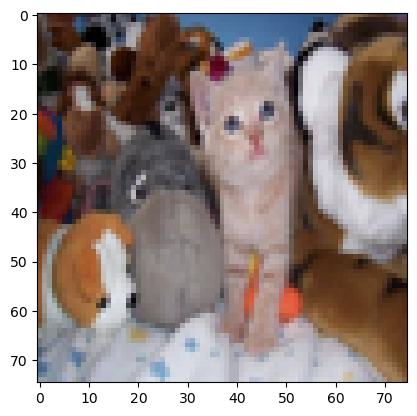

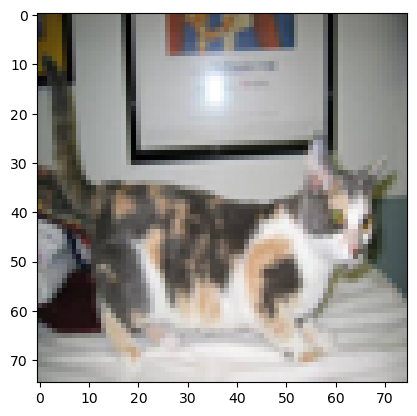

In [6]:
for a in [randint(0, len(features)) for _ in range(10)]:
    plt.imshow(features[a], cmap="gray")
    plt.show()

# 5. DIVISION DES DONNEES

In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(features, targets, test_size=0.05, random_state=42)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_valid.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_valid.shape)

X_train.shape (19000, 75, 75, 3)
X_valid.shape (1000, 75, 75, 3)
y_train.shape (19000, 2)
y_valid.shape (1000, 2)


# 6. CONSTRUCTION DU MODELE

In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(75, 75, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),
    Dropout(0.3),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')  # classification binaire (chat, chien)
])

model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/home/dahouda/anaconda3/envs/Test/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-09 13:02:19.770957: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 73, 73, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 73, 73, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 34, 34, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 15, 15, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 15, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       802,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897,346 (3.42 MB)

 Trainable params: 896,898 (3.42 MB)

 Non-trainable params: 448 (1.75 KB)

In [9]:
#Ajout de la variabilité aux images sans en créer de nouvelles
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train)

# 7. ENTRAINEMENT DU MODELE

In [ ]:
# Entrainement et arrête l’entraînement automatiquement si le modèle ne s’améliore plus
early_stop = EarlyStopping(patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    validation_data=(X_valid, y_valid),
    steps_per_epoch=len(X_train) // 32,
    epochs=50,
    callbacks=[early_stop, checkpoint]
)

Epoch 1/50


/home/dahouda/anaconda3/envs/Test/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


593/593 ━━━━━━━━━━━━━━━━━━━━ 49s 81ms/step - accuracy: 0.5528 - loss: 1.0049 - val_accuracy: 0.6630 - val_loss: 0.6471
Epoch 2/50
  1/593 ━━━━━━━━━━━━━━━━━━━━ 40s 68ms/step - accuracy: 0.6562 - loss: 0.7165

/home/dahouda/anaconda3/envs/Test/lib/python3.11/site-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


593/593 ━━━━━━━━━━━━━━━━━━━━ 1s 731us/step - accuracy: 0.6562 - loss: 0.7165 - val_accuracy: 0.6640 - val_loss: 0.6469
Epoch 3/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.6212 - loss: 0.6523 - val_accuracy: 0.6970 - val_loss: 0.6040
Epoch 4/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 0s 687us/step - accuracy: 0.7188 - loss: 0.5427 - val_accuracy: 0.6980 - val_loss: 0.6054
Epoch 5/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.6650 - loss: 0.6154 - val_accuracy: 0.7260 - val_loss: 0.5685
Epoch 6/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6250 - loss: 0.5823 - val_accuracy: 0.7250 - val_loss: 0.5690
Epoch 7/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 59s 99ms/step - accuracy: 0.6861 - loss: 0.5910 - val_accuracy: 0.7250 - val_loss: 0.5651
Epoch 8/50
593/593 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.7812 - loss: 0.4962 - val_accuracy: 0.7240 - val_loss: 0.5648
Epoch 9/50
361/593 ━━━━━━━━━━━━━━━━━━━━ 18s 80ms/step - accuracy: 0.7114 - loss: 0.5609

# 8. EXEMPLE DE PREDICTION

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Charger le modèle (si tu as sauvegardé au format .keras)
model = load_model('best_model.keras')

# Chemin vers l’image à prédire (tu peux tester avec n’importe quelle image JPG ou PNG)
img_path = 'dogs_vs_cats/train/cats/cat.10011.jpg'

# Prétraitement de l’image
img = image.load_img(img_path, target_size=(75, 75))  # redimensionner comme les images d'entraînement
img_array = image.img_to_array(img)  # convertir en tableau numpy
img_array = img_array / 255.0  # normalisation [0, 1]
img_array = np.expand_dims(img_array, axis=0)  # ajouter une dimension batch

# Prédiction
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction, axis=1)[0]

# Interprétation du résultat
classes = ['chien', 'chat']
print(f"Classe prédite : {classes[predicted_class]} ({prediction[0][predicted_class]*100:.2f}%)")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
Classe prédite : chien (99.46%)


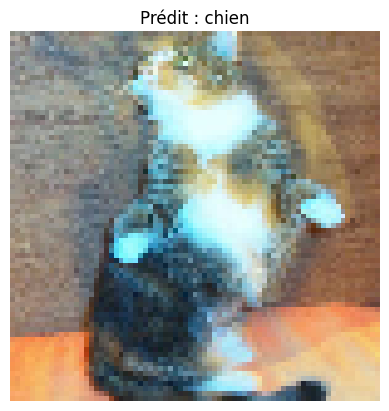

In [ ]:
# Affichage de l'image avec le label prédit
plt.imshow(img)
plt.title(f"Prédit : {classes[predicted_class]}")
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
print("Répartition des classes dans y_train :")
print("Chats :", np.sum(np.argmax(y_train, axis=1) == 0))
print("Chiens :", np.sum(np.argmax(y_train, axis=1) == 1))

Répartition des classes dans y_train :
Chats : 9489
Chiens : 9511


In [ ]:
print("Softmax output :", prediction[0])

Softmax output : [0.9946391  0.00536096]
